<a href="https://colab.research.google.com/github/molinacle/desafio_latam/blob/main/Desaf%C3%ADo_Latam_Prueba_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DESAFÍO LATAM - PRUEBA MACHINE LEARNING**
---

*   ALUMNO: SEBASTIÁN MOLINA
*   MODULO: MACHINE LEARNING
*   CARRERA: DATA SCIENCE

# 1. Descripción del problema de negocio
- **Problema de Negocio:** El objetivo es predecir el precio de los pasajes de avión para clases Business y Economy. La capacidad de predecir los precios de los pasajes de manera precisa permite a las aerolíneas ajustar su estrategia de precios, optimizar la ocupación de asientos, maximizar los ingresos y mejorar la satisfacción del cliente al ofrecer tarifas competitivas.

- **Metodología:** La metodología para abordar este problema incluirá los siguientes pasos:
  - Análisis Exploratorio de Datos (EDA): Entender la estructura y la calidad de los datos, identificar posibles problemas como valores nulos, outliers, etc.
  - Limpieza y Transformación de Datos: Procesar los datos para asegurar que estén listos para el modelado, lo cual incluye manejar valores nulos, transformar variables categóricas, y crear nuevas características si es necesario.
  - Modelado Predictivo: Entrenar varios modelos de machine learning para predecir el precio de los pasajes. Los modelos candidatos podrían incluir regresión lineal, random forest, y gradient boosting, entre otros.
  - Evaluación de Modelos: Evaluar el rendimiento de los modelos utilizando métricas adecuadas y seleccionar el modelo con mejor rendimiento.
Variable Objetivo: La variable objetivo a predecir es el "Precio del pasaje" tanto para la clase Business como Economy.

- **Tareas a realizar:**
  - Cargar y explorar los datasets.
  - Generar un reporte de calidad de datos.
  - Realizar un análisis exploratorio de los datos.
  - Evaluar la correlación entre variables.
  - Preparar los datos para el modelado.
  - Entrenar y evaluar varios modelos.
  - Seleccionar el mejor modelo y realizar optimización de hiperparámetros.
  - Conclusión.

# 2. Carga de los datasets y reporte de calidad
Voy a cargar los archivos proporcionados y generar un reporte de calidad de los datos. Primero, cargaré los datasets y revisaré su estructura inicial. Luego, procederé con la limpieza y análisis de calidad.

In [3]:
# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pickle

In [4]:
# Cargar los archivos proporcionados
df_business = pd.read_excel('business.xlsx')
df_economy = pd.read_excel('economy.xlsx')

In [5]:
# Exploración Inicial de los Datos
df_business.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,2022-02-11,Air India,AI,868,18:00:00,Delhi,02h 00m,non-stop,20:00:00,Mumbai,25612
1,2022-02-11,Air India,AI,624,19:00:00,Delhi,02h 15m,non-stop,21:15:00,Mumbai,25612
2,2022-02-11,Air India,AI,531,20:00:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45:00,Mumbai,42220
3,2022-02-11,Air India,AI,839,21:25:00,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55:00,Mumbai,44450
4,2022-02-11,Air India,AI,544,17:15:00,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55:00,Mumbai,46690


In [6]:
df_economy.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,2022-02-11,SpiceJet,SG,8709,18:55:00,Delhi,02h 10m,non-stop,21:05:00,Mumbai,5953
1,2022-02-11,SpiceJet,SG,8157,06:20:00,Delhi,02h 20m,non-stop,08:40:00,Mumbai,5953
2,2022-02-11,AirAsia,I5,764,04:25:00,Delhi,02h 10m,non-stop,06:35:00,Mumbai,5956
3,2022-02-11,Vistara,UK,995,10:20:00,Delhi,02h 15m,non-stop,12:35:00,Mumbai,5955
4,2022-02-11,Vistara,UK,963,08:50:00,Delhi,02h 20m,non-stop,11:10:00,Mumbai,5955


Lo primero que se observa es que ambos archivos tienen la misma estructura por lo que por un tema de practicidad de análisis y procesamiento los uniremos y para conocer el origen de cada registro crearé la columna 'class'.

In [7]:
# Agregar una columna que indique la clase del vuelo
df_business['class'] = 'business'
df_economy['class'] = 'economy'

# Unir los datasets
data = pd.concat([df_business, df_economy], ignore_index=True)

# Exploración del nuevo dataframe combinado
data.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class
0,2022-02-11,Air India,AI,868,18:00:00,Delhi,02h 00m,non-stop,20:00:00,Mumbai,25612,business
1,2022-02-11,Air India,AI,624,19:00:00,Delhi,02h 15m,non-stop,21:15:00,Mumbai,25612,business
2,2022-02-11,Air India,AI,531,20:00:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45:00,Mumbai,42220,business
3,2022-02-11,Air India,AI,839,21:25:00,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55:00,Mumbai,44450,business
4,2022-02-11,Air India,AI,544,17:15:00,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55:00,Mumbai,46690,business


In [8]:
# Obtener información general del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300261 entries, 0 to 300260
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   date        300261 non-null  datetime64[ns]
 1   airline     300261 non-null  object        
 2   ch_code     300261 non-null  object        
 3   num_code    300261 non-null  int64         
 4   dep_time    300261 non-null  object        
 5   from        300261 non-null  object        
 6   time_taken  300261 non-null  object        
 7   stop        300261 non-null  object        
 8   arr_time    300261 non-null  object        
 9   to          300261 non-null  object        
 10  price       300261 non-null  object        
 11  class       300261 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 27.5+ MB


In [9]:
# Identificar registros duplicados
duplicated_records = data[data.duplicated()]
duplicated_records

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class
94050,2022-02-14,Air India,AI,807,17:20:00,Delhi,15h 15m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,08:35:00,Mumbai,12150,economy
99668,2022-03-13,Air India,AI,475,13:00:00,Delhi,24h 35m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,13:35:00,Mumbai,4780,economy


Con estos simples pasos ya podemos encontrar algunos puntos de mejora para el dataset:
- La variable objetivo 'price' debe convertirse a numérica.
- No hay nulos en el dataset.
- Se deben eliminar los valores duplicados.
- Se debe eliminar la columna 'ch_code' dado que es un ID que representa a la aerolínea y ya tenemos esta información en la columna 'airline'
- Las columnas 'dep_time' y 'arr_time' tienen mucho espacio para mejora, por ejemplo, se pueden convertir en formato hora o crear una nueva columna para definir si el vuelo despega o llega en la madrugada, mañana, mediodia, tarde o noche.
- La columna 'time_taken' debería convertirse a minutos como número entero.
- La columna 'stop' debe transformarse porque es de tipo object y aparecen registros extraños por ejemplo el valor '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...' deberia ser simplemente 1. En mi criterio esta columna debiese ser un número entero que indique la cantidad de escalas del vuelo, por lo que si el vuelo no tiene escalas el valor es 0, si tiene una escala el valor es 1 y así sucesivamente.

Ahora llevaré adelante estas transformaciones antes de seguir con el análisis exploratorio.

# 3. Limpieza del Dataset

In [10]:
# Eliminar las comas y convertir la columna 'price' a numérica
data['price'] = pd.to_numeric(data['price'].replace(',', '', regex=True), errors='coerce')

In [11]:
# Verificar si hay valores no convertidos (NaN)
non_numeric_prices = data[data['price'].isna()]
non_numeric_prices

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class


In [12]:
# Eliminación de los registros duplicados
data.drop_duplicates(inplace=True)
print(data.shape)

(300259, 12)


In [13]:
# Eliminación de la columna 'ch_cod'
data = data.drop(columns=['ch_code'])
print(data.shape)

(300259, 11)


In [14]:
# Convertir 'dep_time' y 'arr_time' a formato de hora
data['dep_time'] = pd.to_datetime(data['dep_time'], format='%H:%M:%S').dt.time
data['arr_time'] = pd.to_datetime(data['arr_time'], format='%H:%M:%S').dt.time

# Función para etiquetar la parte del día
def get_part_of_day(hour):
    if 0 <= hour < 6:
        return 'Madrugada'
    elif 6 <= hour < 12:
        return 'Mañana'
    elif 12 <= hour < 18:
        return 'Tarde'
    else:
        return 'Noche'

# Crear columnas 'dep_part_day' y 'arr_part_day' etiquetando la parte del día
data['dep_part_day'] = data['dep_time'].apply(lambda x: get_part_of_day(x.hour))
data['arr_part_day'] = data['arr_time'].apply(lambda x: get_part_of_day(x.hour))

In [15]:
# Función para convertir 'time_taken' a minutos
def convert_time_to_minutes(time_str):
    hours = 0
    minutes = 0

    # Extraer horas y minutos usando expresiones regulares
    match_hours = re.search(r'(\d+)h', time_str)
    match_minutes = re.search(r'(\d+)m', time_str)

    if match_hours:
        hours = int(match_hours.group(1))
    if match_minutes:
        minutes = int(match_minutes.group(1))

    return hours * 60 + minutes

# Aplicar la conversión de 'time_taken' a minutos
data['time_taken_min'] = data['time_taken'].apply(convert_time_to_minutes)

# Eliminación de la columna 'time_taken'
data = data.drop(columns=['time_taken'])

In [16]:
# Verificar el dominio de valores únicos en la columna 'stop'
data['stop'].unique()

array(['non-stop',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IDR\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXU\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Chennai\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Lucknow\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia STV\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Hyderabad\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia GAY\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '2+-stop',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Guwahati\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia GAU\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia VTZ\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia NDC\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\

In [17]:
# Transformar la columna 'stop' para que solo contenga un número entero que represente la cantidad de escalas del vuelo
data['stop'] = data['stop'].apply(lambda x: 0 if 'non-stop' in x else int(x[0]))

In [18]:
data.dtypes

,0
date,datetime64[ns]
airline,object
num_code,int64
dep_time,object
from,object
stop,int64
arr_time,object
to,object
price,int64
class,object


In [19]:
data.head()

,date,airline,num_code,dep_time,from,stop,arr_time,to,price,class,dep_part_day,arr_part_day,time_taken_min
0,2022-02-11,Air India,868,18:00:00,Delhi,0,20:00:00,Mumbai,25612,business,Noche,Noche,120
1,2022-02-11,Air India,624,19:00:00,Delhi,0,21:15:00,Mumbai,25612,business,Noche,Noche,135
2,2022-02-11,Air India,531,20:00:00,Delhi,1,20:45:00,Mumbai,42220,business,Noche,Noche,1485
3,2022-02-11,Air India,839,21:25:00,Delhi,1,23:55:00,Mumbai,44450,business,Noche,Noche,1590
4,2022-02-11,Air India,544,17:15:00,Delhi,1,23:55:00,Mumbai,46690,business,Tarde,Noche,400


# 4. Análisis Exploratorio de Datos (EDA)
Ahora que se han realizado estas transformaciones tenemos un dataset mcho más limpio para poder realizar un análisis exploratorio. Este EDA considerará:
- Análisis de Distribución.
- Análisis de Correlación entre variables.
- Identificación de Outliers.

### Análisis de Distribución

Vamos a analizar la distribución tanto de las variables numéricas como categóricas.

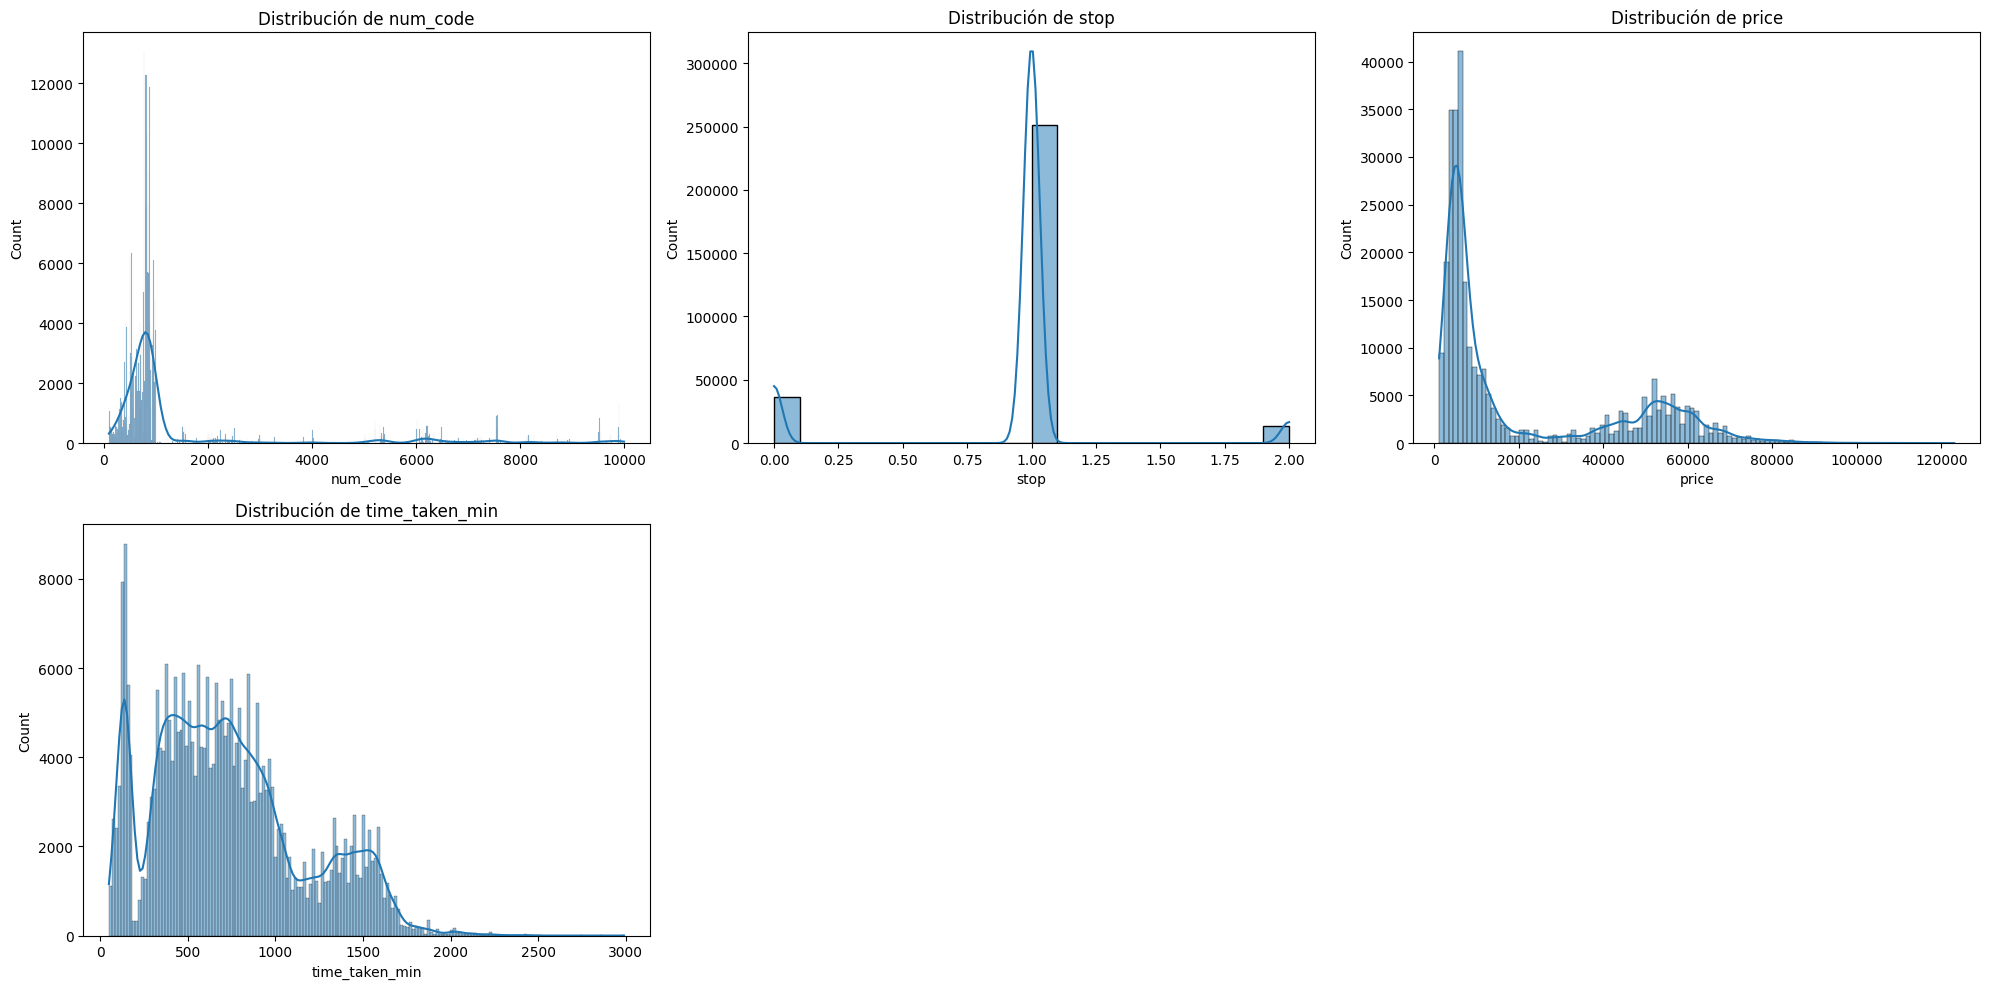

In [20]:
# Lista de columnas numéricas
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Configurar la cuadrícula de los gráficos
plt.figure(figsize=(20, 10))

# Grafica la distribución para cada columna numérica
for i, col in enumerate(numeric_columns):
    plt.subplot(len(numeric_columns) // 3 + 1, 3, i + 1)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribución de {col}')

plt.tight_layout()
plt.show()

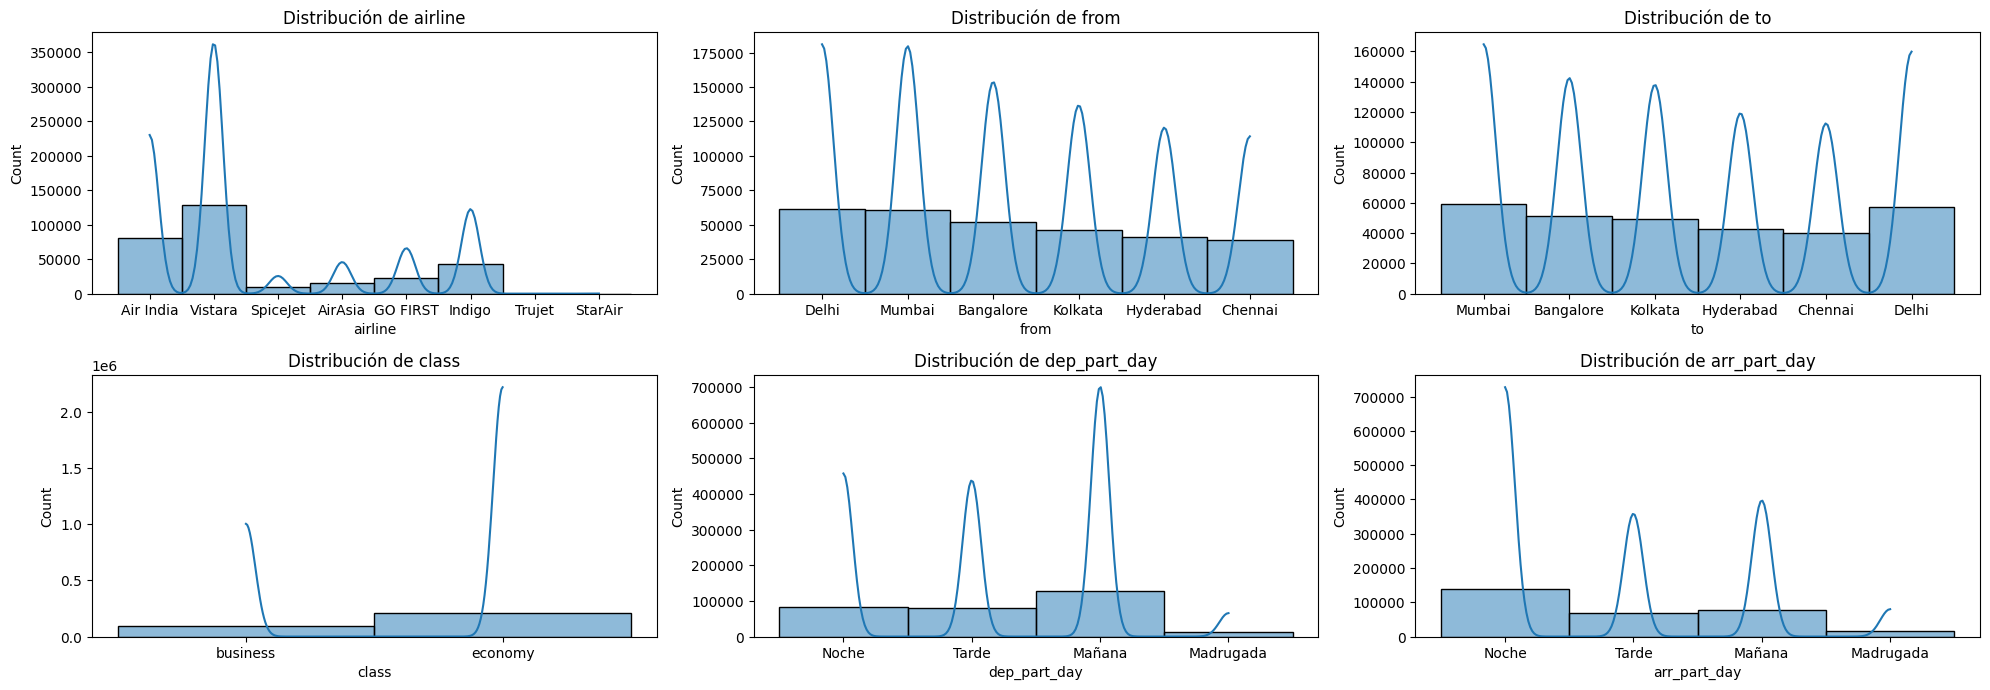

In [21]:
# Visualizar la distribución de las características categóricas
categorical_columns = data.select_dtypes(include=['object']).columns.drop(['dep_time','arr_time'])

# Configurar la cuadrícula de los gráficos
plt.figure(figsize=(20, 10))

# Grafica la distribución para cada columna numérica
for i, col in enumerate(categorical_columns):
    plt.subplot(len(categorical_columns) // 3 + 1, 3, i + 1)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribución de {col}')

plt.tight_layout()
plt.show()

### Análisis de Correlación

Vamos a analizar la correlación de cada variable con la variable objetivo que en este caso es 'price'.

Correlación de las variables con 'price':
price             1.000000
time_taken_min    0.204477
stop              0.119799
num_code         -0.212867
Name: price, dtype: float64


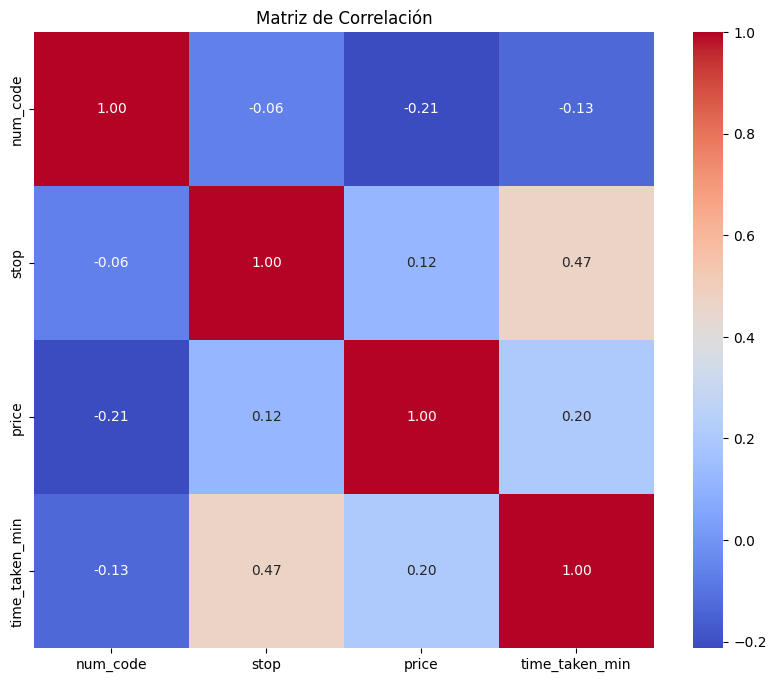

In [22]:
# Seleccionar solo columnas numéricas para el análisis de correlación
numeric_columns = data.select_dtypes(include=['int64','float64'])

# Calcular la matriz de correlación
correlation_matrix = numeric_columns.corr()

# Mostrar la correlación de todas las variables con respecto a 'price'
price_correlation = correlation_matrix['price'].sort_values(ascending=False)
print("Correlación de las variables con 'price':")
print(price_correlation)

# Visualizar la matriz de correlación usando un heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

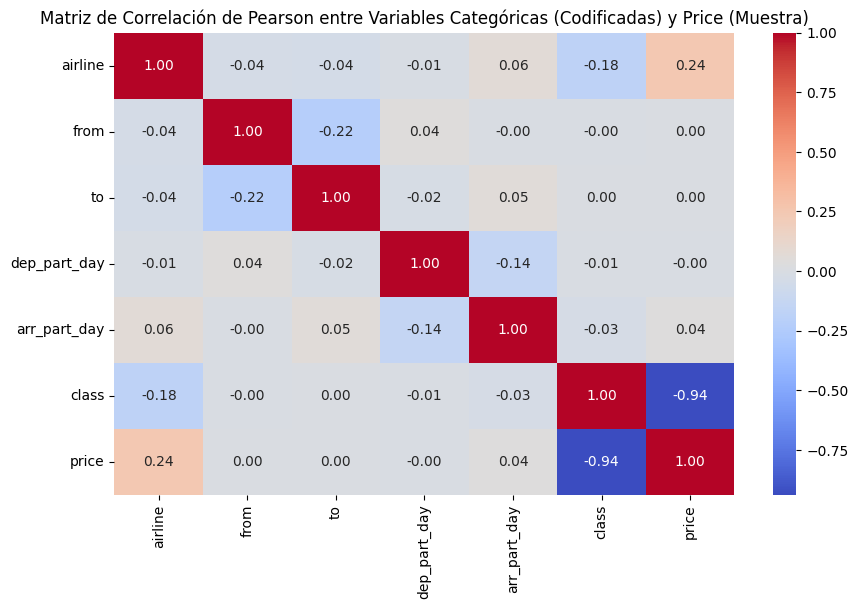

In [23]:
# Convertir variables categóricas a números usando Label Encoding
label_encoders = {}
categorical_columns = ['airline', 'from', 'to', 'dep_part_day', 'arr_part_day', 'class']
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Calcular la correlación de Pearson entre variables categóricas codificadas y 'price'
pearson_correlation_sample = data[categorical_columns + ['price']].corr(method='pearson')

# Visualizar las correlaciones con un heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pearson_correlation_sample, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Pearson entre Variables Categóricas (Codificadas) y Price (Muestra)')
plt.show()

A partir del análisis de correlación vemos que solo las siguientes variables podrían ser buenas predictoras del precio:
- Airline
- Class
- Time_Taken_Min
- Num_Code

Pero solo una de ellas tiene una correlación fuerte, por lo que debemos crear nuevas columnas a partir de las anteriores para tener un par de buenos predictores adicionales.

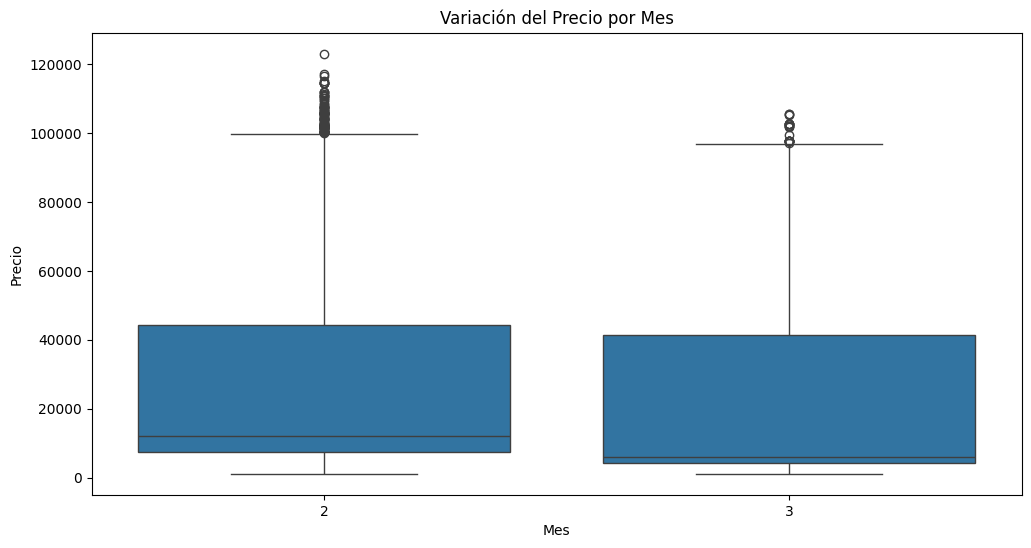

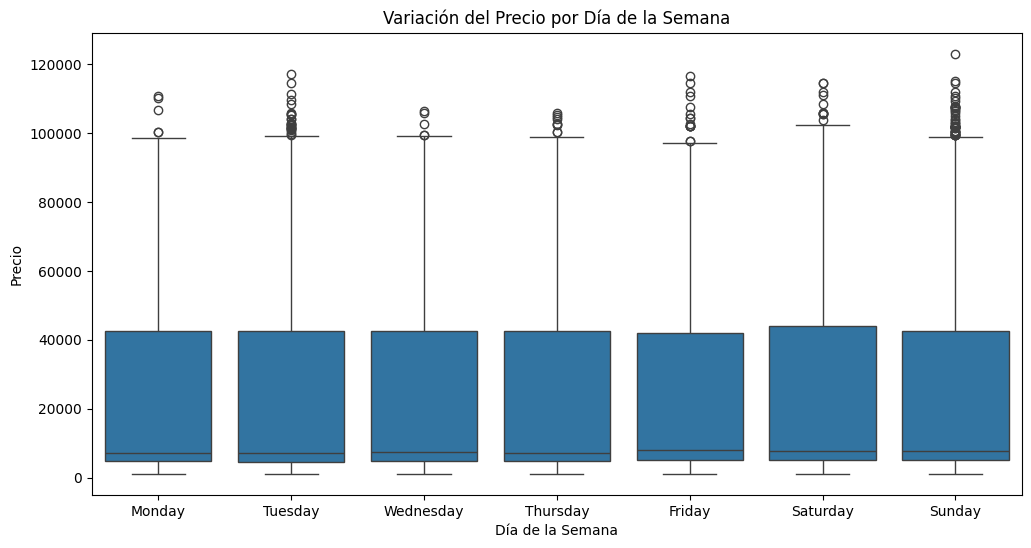

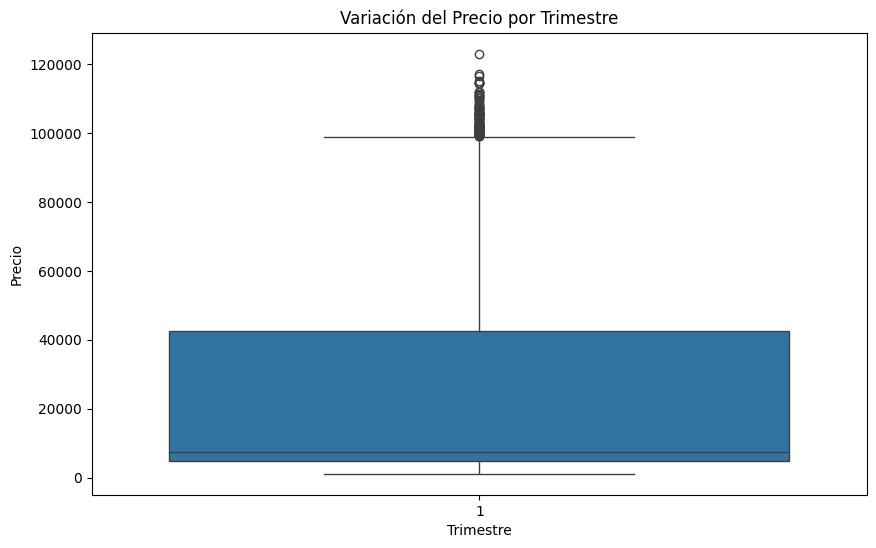

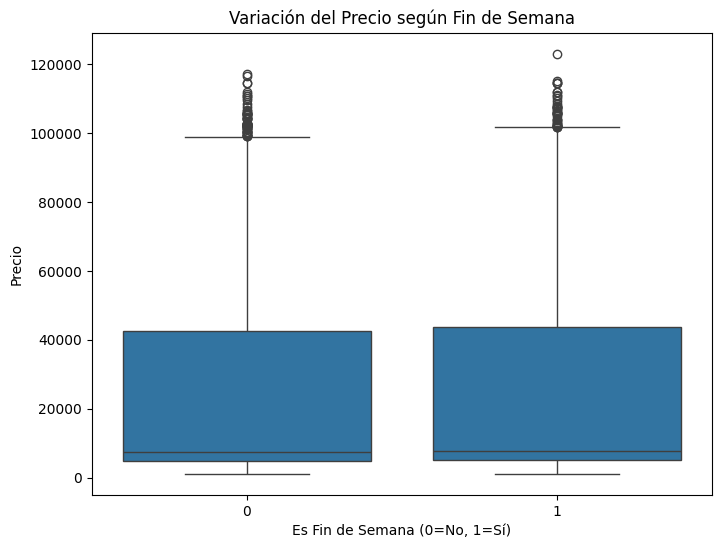

In [24]:
# Convertir 'date' a datetime y extraer información temporal
data['date'] = pd.to_datetime(data['date'], format='%d-%m-%Y')
data['month'] = data['date'].dt.month
data['day_of_week'] = data['date'].dt.day_name()
data['day_of_month'] = data['date'].dt.day
data['quarter'] = data['date'].dt.quarter
data['is_weekend'] = data['day_of_week'].isin(['Saturday', 'Sunday']).astype(int)

# Visualizar la variación del precio por mes
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='price', data=data)
plt.title('Variación del Precio por Mes')
plt.xlabel('Mes')
plt.ylabel('Precio')
plt.show()

# Visualizar la variación del precio por día de la semana
plt.figure(figsize=(12, 6))
sns.boxplot(x='day_of_week', y='price', data=data, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Variación del Precio por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Precio')
plt.show()

# Visualizar la variación del precio por trimestre
plt.figure(figsize=(10, 6))
sns.boxplot(x='quarter', y='price', data=data)
plt.title('Variación del Precio por Trimestre')
plt.xlabel('Trimestre')
plt.ylabel('Precio')
plt.show()

# Visualizar la variación del precio si es fin de semana
plt.figure(figsize=(8, 6))
sns.boxplot(x='is_weekend', y='price', data=data)
plt.title('Variación del Precio según Fin de Semana')
plt.xlabel('Es Fin de Semana (0=No, 1=Sí)')
plt.ylabel('Precio')
plt.show()

Intenté usar la columna 'date' para analizar si existe alguna estacionalidad en el precio de los vuelos pero no veo que exista realmente una diferencia sustantacial en ningún nivel de temporalidad. Por lo que intentaré creando nuevas variables.

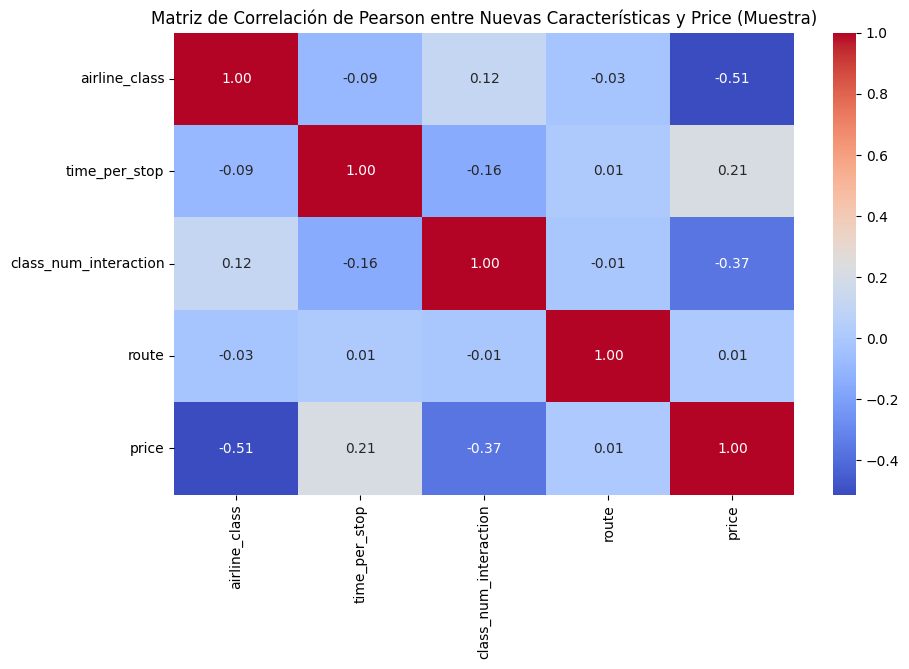

In [25]:
# Asegurar que las columnas 'from' y 'to' son strings y manejar valores nulos
data['from'] = data['from'].astype(str).fillna('Unknown')
data['to'] = data['to'].astype(str).fillna('Unknown')


# Creación de nuevas features.

# 1. Combinación de 'airline' y 'class'
data['airline_class'] = data['airline'] * data['class']

# 2. Tiempo de vuelo ajustado por número de escalas
data['time_per_stop'] = data['time_taken_min'] / (data['stop'] + 1)

# 3. Interacción entre 'class' y 'num_code'
data['class_num_interaction'] = data['class'] * data['num_code']

# 4. Crear la columna de ruta combinando 'from' y 'to'
data['route'] = data['from'] + ' -> ' + data['to']

# Convertir la columna 'route' a un formato numérico usando Label Encoding
le_route = LabelEncoder()
data['route'] = le_route.fit_transform(data['route'])

# Calcular la correlación de Pearson entre nuevas características y 'price'
new_features = ['airline_class', 'time_per_stop', 'class_num_interaction', 'route', 'price']
pearson_correlation_new_features = data[new_features].corr(method='pearson')

# Visualizar las correlaciones con un heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pearson_correlation_new_features, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Pearson entre Nuevas Características y Price (Muestra)')
plt.show()

Vemos que algunas de las nuevas columnas efectivamente generan una mejora en la capacidad predictiva de nuestro modelo. Por ello, y para evitar multicolinealidad y otros efectos adversos eliminaré las variables que no son relevantes para la predicción.

In [26]:
# Eliminar variables originales si las nuevas características son mejores predictoras
columns_to_drop = ['airline', 'from', 'to', 'dep_part_day', 'arr_part_day', 'time_taken_min', 'stop', 'num_code', 'date', 'month', 'day_of_week', 'day_of_month', 'quarter', 'is_weekend', 'route', 'dep_time', 'arr_time']
data = data.drop(columns=columns_to_drop)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300259 entries, 0 to 300260
Data columns (total 5 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   price                  300259 non-null  int64  
 1   class                  300259 non-null  int64  
 2   airline_class          300259 non-null  int64  
 3   time_per_stop          300259 non-null  float64
 4   class_num_interaction  300259 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 13.7 MB


In [28]:
data.head()

,price,class,airline_class,time_per_stop,class_num_interaction
0,25612,0,0,120.0,0
1,25612,0,0,135.0,0
2,42220,0,0,742.5,0
3,44450,0,0,795.0,0
4,46690,0,0,200.0,0


Columnas en el DataFrame final: Index(['price', 'class', 'airline_class', 'time_per_stop',
       'class_num_interaction'],
      dtype='object')
Porcentaje de Outliers por columna usando el método IQR:
{'price': 0.040964633866095605, 'class': 0.0, 'airline_class': 0.0, 'time_per_stop': 0.46426585048241686, 'class_num_interaction': 12.101219280687674}

Porcentaje de Outliers por columna usando Z-score:
{'price': 0.2004935738812159, 'class': 0.0, 'airline_class': 0.0, 'time_per_stop': 0.20748753576079318, 'class_num_interaction': 3.7487635674534316}


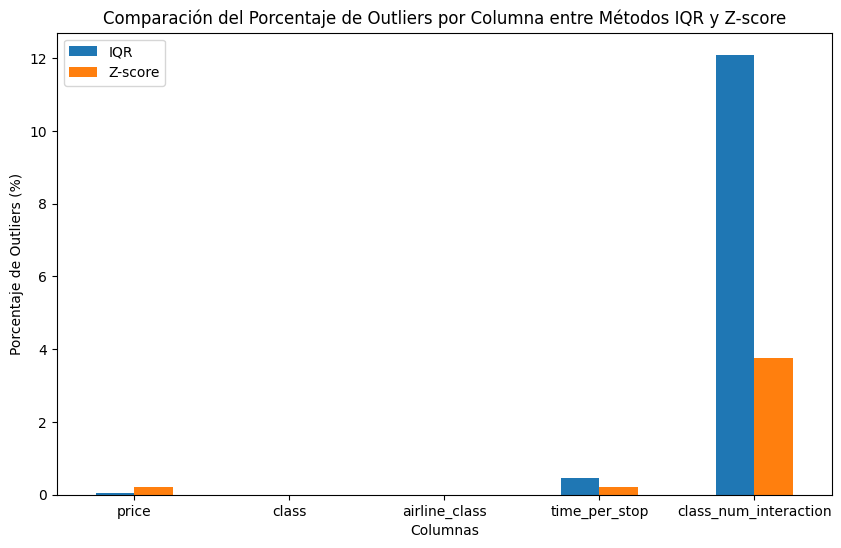

In [30]:
# Dataset final con las variables seleccionadas
dataset_final = data[['price', 'class', 'airline_class', 'time_per_stop', 'class_num_interaction']]

# Verificar que todas las columnas están presentes
print("Columnas en el DataFrame final:", dataset_final.columns)

# Número total de filas en el dataset
total_rows = dataset_final.shape[0]

# Función para detectar outliers usando el método IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Calcular el porcentaje de outliers por columna usando el método IQR
iqr_outliers_percent = {}
for column in dataset_final.columns:
    num_outliers = detect_outliers_iqr(dataset_final, column).shape[0]
    iqr_outliers_percent[column] = (num_outliers / total_rows) * 100

# Calcular Z-scores para todas las columnas y convertirlos a un DataFrame
z_scores_df = pd.DataFrame(zscore(dataset_final), columns=dataset_final.columns)

# Calcular el porcentaje de outliers por columna usando Z-score
zscore_outliers_percent = {}
for column in z_scores_df.columns:
    num_outliers = (np.abs(z_scores_df[column]) > 3).sum()  # Acceso directo a través del nombre de la columna
    zscore_outliers_percent[column] = (num_outliers / total_rows) * 100

# Comparar los resultados de ambos métodos
print("Porcentaje de Outliers por columna usando el método IQR:")
print(iqr_outliers_percent)

print("\nPorcentaje de Outliers por columna usando Z-score:")
print(zscore_outliers_percent)

# Visualización de la comparación
comparison_df = pd.DataFrame({'IQR': iqr_outliers_percent, 'Z-score': zscore_outliers_percent})
comparison_df.plot(kind='bar', figsize=(10, 6))
plt.title('Comparación del Porcentaje de Outliers por Columna entre Métodos IQR y Z-score')
plt.ylabel('Porcentaje de Outliers (%)')
plt.xlabel('Columnas')
plt.xticks(rotation=0)
plt.show()

Vamos a comparar los dos métodos utilizados para detectar outliers: el método del Rango Intercuartil (IQR) y el método del Z-score.

Comparación de Resultados
- Price:
  - IQR: 0.04% de outliers.
  - Z-score: 0.20% de outliers.
  - Interpretación: El método Z-score detecta más outliers en price que el método IQR. Esto podría ser porque Z-score es más sensible a valores extremos que se encuentran más allá de 3 desviaciones estándar de la media.

- Class:
  - IQR: 0% de outliers.
  - Z-score: 0% de outliers.
  - Interpretación: Ninguno de los métodos detecta outliers en class, lo cual es esperado si class contiene valores que no son numéricamente extremos.

- Airline_Class:
  - IQR: 0% de outliers.
  - Z-score: 0% de outliers.
  - Interpretación: Similar a class, no hay outliers detectados en airline_class por ninguno de los métodos.

- Time_Per_Stop:
  - IQR: 0.46% de outliers.
  - Z-score: 0.21% de outliers.
  - Interpretación: El método IQR detecta más outliers en time_per_stop que el método Z-score. Esto podría deberse a que IQR es más efectivo para detectar outliers en distribuciones no normales o cuando los datos tienen valores extremos leves que caen fuera del rango IQR.

- Class_Num_Interaction:
  - IQR: 12.10% de outliers.
  - Z-score: 3.75% de outliers.
  - Interpretación: Hay una gran diferencia en la detección de outliers en class_num_interaction entre los dos métodos. El método IQR detecta significativamente más outliers que el Z-score, lo que sugiere que class_num_interaction podría tener una distribución sesgada o con múltiples picos donde el IQR es más efectivo para detectar valores extremos.


Conclusión

Para price, debido a la baja tasa de outliers detectados por ambos métodos, el método Z-score podría ser más informativo para capturar los valores extremos más significativos.
Para time_per_stop y class_num_interaction, el método IQR es preferible porque es más robusto frente a distribuciones no normales y detecta más outliers, lo que sugiere que es mejor para capturar valores extremos en estas características.

Por lo anterior, vamos a utilizar una combinación de ambos métodos según la distribución de cada variable:

- Z-score para price.
- IQR para time_per_stop y class_num_interaction.

Esto permitirá un manejo más robusto de los outliers dependiendo de las características individuales de cada variable.

In [31]:
# 1. Eliminar outliers usando Z-score para 'price'
z_scores_price = np.abs(zscore(dataset_final['price']))
price_outliers = z_scores_price > 3  # Identifica outliers donde Z-score > 3

# 2. Eliminar outliers usando IQR para 'time_per_stop' y 'class_num_interaction'
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    non_outliers = (data[column] >= lower_bound) & (data[column] <= upper_bound)  # Filtra los no outliers
    return non_outliers

# Identificar los índices no atípicos usando IQR
non_outliers_time_per_stop = remove_outliers_iqr(dataset_final, 'time_per_stop')
non_outliers_class_num_interaction = remove_outliers_iqr(dataset_final, 'class_num_interaction')

# Combinar todas las condiciones para identificar todas las filas no atípicas
non_outliers_combined = (~price_outliers) & non_outliers_time_per_stop & non_outliers_class_num_interaction

# Crear el nuevo DataFrame eliminando los outliers
data = dataset_final[non_outliers_combined]

Hemos llegado al punto en donde no se necesitan más transformaciones por lo que vamos a desarrollar nuestro modelo, pero primero voy a crear una función que genere de forma directa todas las trasformaciones necesarias para la ejecución del modelo.

In [35]:
import pandas as pd
import numpy as np
import re
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore

def process_flight_data(business_path, economy_path):
    # Cargar los datasets
    df_business = pd.read_excel(business_path)
    df_economy = pd.read_excel(economy_path)

    # Agregar la columna 'class'
    df_business['class'] = 'business'
    df_economy['class'] = 'economy'

    # Unir los datasets
    data = pd.concat([df_business, df_economy], ignore_index=True)

    # Eliminar las comas y convertir 'price' a numérico
    data['price'] = pd.to_numeric(data['price'].replace(',', '', regex=True), errors='coerce')

    # Eliminar duplicados
    data.drop_duplicates(inplace=True)

    # Función para convertir 'time_taken' a minutos
    def convert_time_to_minutes(time_str):
        hours = 0
        minutes = 0

        # Extraer horas y minutos usando expresiones regulares
        match_hours = re.search(r'(\d+)h', str(time_str))
        match_minutes = re.search(r'(\d+)m', str(time_str))

        if match_hours:
            hours = int(match_hours.group(1))
        if match_minutes:
            minutes = int(match_minutes.group(1))

        return hours * 60 + minutes

    # Aplicar la conversión de 'time_taken' a minutos
    data['time_taken_min'] = data['time_taken'].apply(convert_time_to_minutes)

    # Eliminar la columna 'time_taken'
    data = data.drop(columns=['time_taken'])

    # Transformar la columna 'stop'
    data['stop'] = data['stop'].apply(lambda x: 0 if 'non-stop' in str(x) else int(x[0]))

    # Convertir variables categóricas a números usando Label Encoding
    label_encoders = {}
    categorical_columns = ['airline', 'class']
    for col in categorical_columns:
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
        label_encoders[col] = le

    # Creación de nuevas features
    data['airline_class'] = data['airline'] * data['class']
    data['time_per_stop'] = data['time_taken_min'] / (data['stop'] + 1)
    data['class_num_interaction'] = data['class'] * data['num_code']

    # Eliminar variables no relevantes
    columns_to_drop = ['airline', 'from', 'to', 'time_taken_min', 'stop', 'num_code', 'date', 'dep_time', 'arr_time', 'ch_code']
    data = data.drop(columns=columns_to_drop)

    # Dataset final con las variables seleccionadas
    dataset_final = data[['price', 'class', 'airline_class', 'time_per_stop', 'class_num_interaction']]

    # Eliminar outliers usando Z-score para 'price'
    z_scores_price = np.abs(zscore(dataset_final['price']))
    price_outliers = z_scores_price > 3  # Identifica outliers donde Z-score > 3

    # Función para eliminar outliers usando IQR
    def remove_outliers_iqr(data, column):
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        non_outliers = (data[column] >= lower_bound) & (data[column] <= upper_bound)  # Filtra los no outliers
        return non_outliers

    # Identificar los índices no atípicos usando IQR
    non_outliers_time_per_stop = remove_outliers_iqr(dataset_final, 'time_per_stop')
    non_outliers_class_num_interaction = remove_outliers_iqr(dataset_final, 'class_num_interaction')

    # Combinar todas las condiciones para identificar todas las filas no atípicas
    non_outliers_combined = (~price_outliers) & non_outliers_time_per_stop & non_outliers_class_num_interaction

    # Crear el nuevo DataFrame eliminando los outliers
    data = dataset_final[non_outliers_combined]

    return data

# Ruta de los archivos Excel
business_path = 'business.xlsx'
economy_path = 'economy.xlsx'

# Procesar los datos
processed_data = process_flight_data(business_path, economy_path)
processed_data.head()

,price,class,airline_class,time_per_stop,class_num_interaction
0,25612,0,0,120.0,0
1,25612,0,0,135.0,0
2,42220,0,0,742.5,0
3,44450,0,0,795.0,0
4,46690,0,0,200.0,0


Ahora ya puedo proceder con la separación del dataset, optimizar los hiperparámetros, entrenar los modelos candidatos, definir un baseline y evaluar sus resultados para seleccionar al que mejor predice los precios de los pasajes de avión.

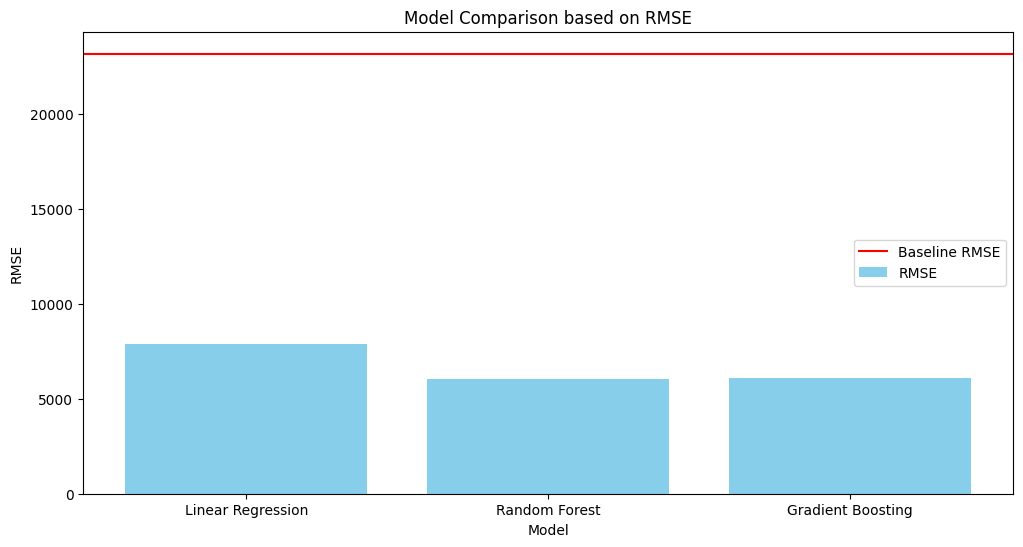

In [32]:
# Dividir el conjunto de datos en características (X) y variable objetivo (y)
X = data.drop('price', axis=1)
y = data['price']

# División del conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelos candidatos
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

# Parámetros para GridSearchCV
param_grids = {
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30]
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }
}

# Resultados de los modelos
results = {}

# Entrenamiento y optimización de hiperparámetros
for model_name, model in models.items():
    if model_name in param_grids:
        grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
        results[model_name] = best_model
    else:
        model.fit(X_train, y_train)
        results[model_name] = model

# Guardar los modelos entrenados
for model_name, model in results.items():
    with open(f'{model_name}_model.pkl', 'wb') as f:
        pickle.dump(model, f)

# Evaluación de los modelos
metrics = {
    'Model': [],
    'RMSE': [],
    'MAE': [],
    'R2 Score': []
}

# Baseline (Media de los precios)
baseline_prediction = np.mean(y_train)
baseline_rmse = mean_squared_error(y_test, [baseline_prediction] * len(y_test), squared=False)
baseline_mae = mean_absolute_error(y_test, [baseline_prediction] * len(y_test))
baseline_r2 = r2_score(y_test, [baseline_prediction] * len(y_test))

# Evaluación de cada modelo
for model_name, model in results.items():
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    metrics['Model'].append(model_name)
    metrics['RMSE'].append(rmse)
    metrics['MAE'].append(mae)
    metrics['R2 Score'].append(r2)

# Mostrar resultados
metrics_df = pd.DataFrame(metrics)

# Graficar comparación de métricas
plt.figure(figsize=(12, 6))
plt.bar(metrics_df['Model'], metrics_df['RMSE'], color='skyblue', label='RMSE')
plt.axhline(y=baseline_rmse, color='r', linestyle='-', label='Baseline RMSE')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('Model Comparison based on RMSE')
plt.legend()
plt.show()

### ¿Qué es el RMSE?
El RMSE es una métrica que mide la diferencia promedio entre los valores predichos por un modelo y los valores reales del conjunto de datos. Se calcula tomando la raíz cuadrada del promedio de los cuadrados de estas diferencias. Un RMSE más bajo indica que el modelo tiene errores de predicción más pequeños y, por lo tanto, es más preciso.


### ¿Qué es el Baseline?
Un baseline es un punto de referencia o modelo sencillo que se utiliza para comparar la efectividad de modelos más complejos. En el contexto de predicción de precios, un baseline común es simplemente la media de los precios en el conjunto de entrenamiento. Este modelo "predice" el precio promedio para cualquier entrada sin considerar ninguna característica específica del vuelo.


### Interpretación
En este caso el gráfico muestra un RMSE del Baseline más alto que el de los 3 modelos candidados, lo que indica que el modelo del baseline (en este caso, la media de los precios) tiene un error de predicción mayor. Esto es porque, al usar un promedio como predicción para todos los datos, no se captura la variabilidad de los precios basada en las características específicas (como clase, aerolínea, tiempo de vuelo, etc.).

Los modelos entrenados (como la regresión lineal, random forest, o gradient boosting) utilizan las características disponibles para aprender patrones y relaciones más complejas que afectan el precio de los pasajes. Por lo tanto, son capaces de hacer predicciones más precisas que simplemente asumir un valor promedio, por lo tanto su capacidad de predicción es mayor y en consecuencia el RMSE es más bajo.


### Conclusión
Un RMSE más bajo en los modelos desarrollados en comparación con el baseline indica que estos modelos son más efectivos y han capturado mejor las relaciones subyacentes en los datos. Esto demuestra que el uso de un enfoque más sofisticado de machine learning mejora la precisión de las predicciones en comparación con un enfoque simple y general como el baseline.

Ahora que sabemos que los 3 modelos candidatos tienen mejores resultados que el baseline, analicemos en detalle las métricas de cada modelo para decidir cuál es el que mejor predice los precios de los pasajes de avión.

In [33]:
metrics_df

,Model,RMSE,MAE,R2 Score
0,Linear Regression,7918.007282,5101.040037,0.883498
1,Random Forest,6036.041188,3889.233572,0.932298
2,Gradient Boosting,6078.037776,3994.418327,0.931352


Las métricas presentadas para los tres modelos—Regresión Lineal, Random Forest y Gradient Boosting—ofrecen una visión detallada de su desempeño en la tarea de predicción de precios de pasajes de avión. Vamos a analizar cada métrica para cada modelo.

## 1. Linear Regression
  - **RMSE (Root Mean Squared Error): 7918.01**
    
    Esta métrica indica que, en promedio, las predicciones del modelo de regresión lineal difieren de los valores reales por aproximadamente 7918 unidades monetarias (por ejemplo, dólares o la moneda específica de los datos). Un RMSE más alto en comparación con otros modelos significa que la regresión lineal tiene más errores de predicción.

  - **MAE (Mean Absolute Error): 5101.04**
    
    El MAE representa el error absoluto medio, es decir, la magnitud promedio de los errores sin considerar su dirección. Un MAE de 5101.04 sugiere que, en promedio, las predicciones de la regresión lineal están desviadas del valor real por aproximadamente 5101 unidades monetarias.

  - **R² Score: 0.8835**
    
    El R² o coeficiente de determinación indica qué proporción de la variabilidad en la variable dependiente (precio) es explicada por las variables independientes (características del vuelo) en el modelo. Un R² de 0.8835 significa que el modelo de regresión lineal explica aproximadamente el 88.35% de la variabilidad de los precios, lo cual es bastante bueno, pero menos efectivo que los modelos más complejos como Random Forest y Gradient Boosting.

## 2. Random Forest
  - **RMSE: 6036.04**
    
    El modelo de Random Forest tiene un RMSE más bajo que el modelo de regresión lineal, lo que sugiere que sus predicciones están, en promedio, más cerca de los valores reales. Esto indica que el Random Forest es más preciso que la regresión lineal en este caso.

  - **MAE: 3889.23**
  
    El MAE de 3889.23 es también más bajo que el de la regresión lineal, reforzando la idea de que las predicciones del modelo Random Forest son, en promedio, más precisas y tienen errores menores en comparación con la regresión lineal.

  - **R² Score: 0.9323**
    
    Un R² de 0.9323 indica que el modelo Random Forest explica aproximadamente el 93.23% de la variabilidad en los precios de los pasajes de avión, lo cual es superior al modelo de regresión lineal. Esto sugiere que Random Forest captura mejor la relación no lineal entre las características del vuelo y el precio.

## 3. Gradient Boosting
  - **RMSE: 6078.04**
    
    El RMSE de Gradient Boosting es ligeramente superior al de Random Forest, pero aún significativamente más bajo que el de la regresión lineal. Esto indica que las predicciones de Gradient Boosting son bastante precisas y comparables a las de Random Forest.

  - **MAE: 3994.42**
    
    El MAE de 3994.42 es también más bajo que el de la regresión lineal, pero un poco más alto que el de Random Forest. Esto sugiere que, aunque Gradient Boosting es muy preciso, en promedio, sus errores son ligeramente mayores en comparación con Random Forest.

  - **R² Score: 0.9314**
  
    Un R² de 0.9314 es muy cercano al de Random Forest, indicando que el modelo de Gradient Boosting también explica una gran parte (93.14%) de la variabilidad en los precios de los pasajes de avión. Esto muestra que ambos modelos complejos son igualmente efectivos en capturar las relaciones subyacentes en los datos.

## Conclusión General
Random Forest es el modelo más efectivo en términos de precisión y error de predicción, con el RMSE más bajo, el MAE más bajo y un R² ligeramente superior al de Gradient Boosting.

Gradient Boosting también es un modelo muy fuerte y competitivo, con un rendimiento muy similar al de Random Forest. Es especialmente útil si se necesita un enfoque más robusto en casos donde el modelo Random Forest podría ser propenso a overfitting o en datos con una relación más compleja.

Linear Regression es el modelo menos efectivo entre los tres, lo cual era de esperar ya que es un modelo más simple que puede no capturar relaciones no lineales entre las características del vuelo y el precio tan bien como los otros dos modelos.